In [1]:
#IMPORTING THE IMPORTANT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('startup_funding.csv',encoding='UTF-8')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
#CHECKING FOR THE NULL / NAN VALUES

df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [4]:
#AS REMARKS COLUMN IS EMPTY SO, WE WILL DROP IT.
df.drop(['Remarks'],axis=1,inplace=True)
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

<h1>QUESTION-1</h1>
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

1. WE NEED TO DROP THE ROWS WHERE CITIES ARE NOT MENTIONED

2. WE WILL REPLACE ALL THE OCCURENCES OF 'bangalore' WITH 'Bangalore'

3. WE WILL REPLACE ALL THE OCCURENCES OF 'Delhi' WITH 'New Delhi'

4. WE WILL REMOVE THE '/' PROBLEM AND WILL ONLY CONSIDER THE INDIAN CITIES

In [5]:

def city_location_rectification(city):
  return city.split('/')[0].strip()
df.dropna(subset=["CityLocation"],inplace=True)
df['CityLocation']=df['CityLocation'].apply(city_location_rectification)
df[df['CityLocation'] == 'bangalore']='Bangalore'
df[df['CityLocation'] == 'delhi'] = 'Delhi'

In [6]:
pd.Categorical(df['CityLocation'])

['Bangalore', 'Mumbai', 'New Delhi', 'Mumbai', 'Hyderabad', ..., 'Bangalore', 'Bangalore', 'Bangalore', 'Chennai', 'Noida']
Length: 2193
Categories (48, object): ['Agra', 'Ahmedabad', 'Bangalore', 'Belgaum', ..., 'Udaipur', 'Udupi',
                          'Vadodara', 'Varanasi']

TOTAL 48 CITIES ARE THERE. HOWEVER, WE NEED TO ONLY CONSIDER BANGALORE, MUMBAI AND NCR(NEW DELHI, GURGAON AND NOIDA)

WE WILL FILTER THE DATA SET

In [7]:
new_df= df[(df['CityLocation'] == 'Mumbai') | (df['CityLocation'] == 'New Delhi') | (df['CityLocation'] == 'Bangalore') | 
           (df['CityLocation'] == 'Gurgaon') | (df['CityLocation'] == 'Noida')]
new_df.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000"
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000"
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000"
10,10,05/07/2017,Timesaverz,Consumer Internet,Hyperlocal home services provider,Mumbai,BCCL,Private Equity,"1,000,000"
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN


In [8]:
new_df['AmountInUSD'].fillna(0,inplace=True)
new_df.head(10)

<ipython-input-8-61838e460ecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AmountInUSD'].fillna(0,inplace=True)


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000"
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000"
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000"
10,10,05/07/2017,Timesaverz,Consumer Internet,Hyperlocal home services provider,Mumbai,BCCL,Private Equity,"1,000,000"
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,0


In [11]:
new_df['AmountInUSD'] = new_df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

<ipython-input-11-3ab7d53e0385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AmountInUSD'] = new_df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))


In [12]:
new_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0
...,...,...,...,...,...,...,...,...,...
2194,2194,29/04/2015,ReGlobe,Used Gadgets Buy / Refurbishing,NaN,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,1000000.0
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000.0
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000.0


In [13]:
new_df = new_df.groupby('CityLocation')['AmountInUSD'].count()
new_df = new_df.sort_values(ascending = False)

In [14]:
city_name=new_df.index
funding_total=new_df.values

print(new_df)

CityLocation
Bangalore    635
Mumbai       449
New Delhi    385
Gurgaon      241
Noida         79
Name: AmountInUSD, dtype: int64


PLOTTING THE BAR GRAPH

[]

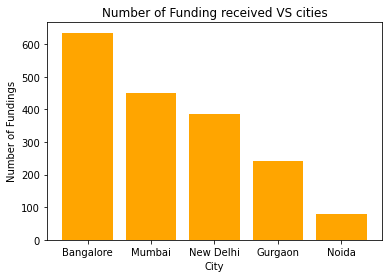

In [15]:
plt.bar(city_name,funding_total,color='orange')
plt.title('Number of Funding received VS cities')
plt.xlabel('City')
plt.ylabel('Number of Fundings')
plt.plot()

<h1> PROBLEM-2</h1>
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

FIRSTLY, WE WILL TAKE CARE OF UNDISCLOSED INVESTORS

In [32]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName'])
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']


CREATING NEW DF FOR INVESTORS

In [33]:
investors=df.InvestorsName
investors

0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2290, dtype: object

THERE ARE MULTIPLE INVESTORS IN A SINGLE FUNDING, HENCE, WE WILL SEPARATE THEM. FOR SIMPLICITY, WE WILL USE LIST AND DICTIONARY

In [34]:
investors.isnull().sum()

0

In [39]:
investor_list=[]
for name in investors:
  if name !='':
    temp=name.split(',')
    for temp_name in temp:
      investor_list.append(temp_name.strip())

print(investor_list)
print(len(investor_list))

['Kae Capital', 'Triton Investment Advisors', 'Kashyap Deorah', 'Anand Sankeshwar', 'Deepak Jain', 'Sadashiva NT', 'Arjun Mehta', 'Satish Kaul', 'Anindya Ghose', 'Kunal Shah', 'LetsVenture', 'Anupam Mittal', 'Hetal Sonpal', 'Narottam Thudi', 'Shireesh Palle', 'Reliance Corporate Advisory Services Ltd', 'Infuse Ventures', 'JLL', 'Asset Management (Asia) Ltd', 'Digital Garage Inc', 'Kalaari Capital', 'Nexus India Capital Advisors', 'International Finance Corporation', 'Rocketship', 'Accel Partners', 'Jungle Ventures', 'Shailesh Rao', 'Venture Highway', 'BCCL', 'Blume Ventures', 'Contrarian Capital India Partners', 'Emergent Ventures India', 'Pallav Nadhani', 'Ashish Gupta', 'Sharad Sharma', 'Sirion Labs', 'India Quotient', 'Shunwei Capital', 'Sreeram Iyer', 'Suvo Sarkar', 'Anita Gupta', 'Likemind Ventures', 'Mitsui & Co.', 'Dunamis Ventures Pte Ltd', 'Venture Catalysts', 'Sourav Ganguly', 'Ankit Aditya', 'Moksh Sports Ventures', 'Fireside Ventures', 'Apurva Salarpuria', 'Sidharth Pansari

In [40]:
ans_dict={}
for name in investor_list:
    ans_dict[name] = ans_dict.get(name,0) + 1

print(ans_dict)

{'Kae Capital': 22, 'Triton Investment Advisors': 1, 'Kashyap Deorah': 3, 'Anand Sankeshwar': 2, 'Deepak Jain': 1, 'Sadashiva NT': 1, 'Arjun Mehta': 1, 'Satish Kaul': 1, 'Anindya Ghose': 1, 'Kunal Shah': 17, 'LetsVenture': 17, 'Anupam Mittal': 18, 'Hetal Sonpal': 1, 'Narottam Thudi': 1, 'Shireesh Palle': 1, 'Reliance Corporate Advisory Services Ltd': 1, 'Infuse Ventures': 8, 'JLL': 2, 'Asset Management (Asia) Ltd': 1, 'Digital Garage Inc': 1, 'Kalaari Capital': 44, 'Nexus India Capital Advisors': 1, 'International Finance Corporation': 2, 'Rocketship': 2, 'Accel Partners': 53, 'Jungle Ventures': 13, 'Shailesh Rao': 1, 'Venture Highway': 3, 'BCCL': 1, 'Blume Ventures': 39, 'Contrarian Capital India Partners': 1, 'Emergent Ventures India': 1, 'Pallav Nadhani': 4, 'Ashish Gupta': 6, 'Sharad Sharma': 4, 'Sirion Labs': 1, 'India Quotient': 21, 'Shunwei Capital': 3, 'Sreeram Iyer': 1, 'Suvo Sarkar': 1, 'Anita Gupta': 1, 'Likemind Ventures': 1, 'Mitsui & Co.': 2, 'Dunamis Ventures Pte Ltd': 1

In [41]:
ans_dict_keys=sorted(ans_dict,key=ans_dict.get,reverse=True)
print(ans_dict_keys)

['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners', 'Indian Angel Network', 'Blume Ventures', '', 'Ratan Tata', 'Rajan Anandan', 'Tiger Global', 'Nexus Venture Partners', 'Kae Capital', 'IDG Ventures', 'India Quotient', '500 Startups', 'Anupam Mittal', 'Matrix Partners', 'Kunal Shah', 'LetsVenture', 'Mumbai Angels', 'Omidyar Network', 'Unitus Seed Fund', 'Sequoia India', 'Norwest Venture Partners', 'IDG Ventures India', 'Group of Angel Investors', 'Bessemer Venture Partners', 'TV Mohandas Pai', 'Sandeep Tandon', 'Tracxn Labs', 'Helion Venture Partners', 'ah! Ventures', 'Tiger Global Management', 'Jungle Ventures', 'Girish Mathrubootham', 'Anand Chandrasekaran', 'Brand Capital', 'Kunal Bahl', 'The Chennai Angels', 'Lightspeed Venture Partners', 'Singapore Angel Network', 'Aprameya Radhakrishna', 'Rohit Bansal', 'YouWeCan Ventures', 'Vijay Shekhar Sharma', 'Orios Venture Partners', 'Axilor Ventures', 'Flipkart', 'YourNest Angel Fund', 'RoundGlass Partners', 'Nandan 

In [42]:
c=0
final_investor_list=[]
final_investment_count=[]

for i in range(len(ans_dict_keys)):
  print(ans_dict_keys[i],ans_dict[ans_dict_keys[i]])

  final_investor_list.append(ans_dict_keys[i])
  final_investment_count.append(ans_dict[ans_dict_keys[i]])
  c+=1

  if c==5:
    break


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


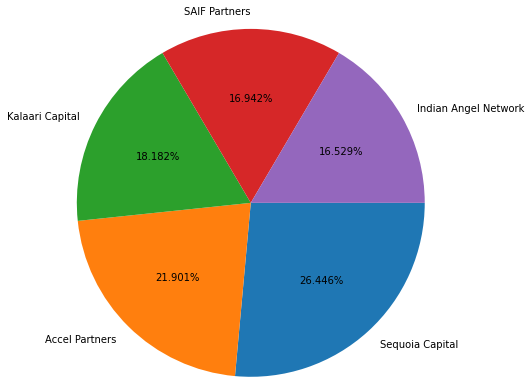

In [44]:
plt.pie(final_investment_count,labels=final_investor_list,autopct='%0.3f%%',counterclock=False,radius=2.0)

plt.show()

<h1>PROBLEM-3</h1>
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [45]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']


In [46]:
df.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [47]:
df.drop(['Remarks'],axis=1,inplace=True)

In [48]:
df.head(5)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [73]:
investor_list=[]
startup_list=[]

for index, row in df.iterrows():
  investor_name=row['InvestorsName']
  startup_name=row['StartupName']

  investor_name=str(investor_name)
  temp=investor_name.split(',')

  for name in temp:

    if name != '':
      investor_list.append(name)
      startup_list.append(startup_name)

print(investor_list)
print(startup_list)
  

['Kae Capital', 'Triton Investment Advisors', 'Kashyap Deorah', ' Anand Sankeshwar', ' Deepak Jain', ' Sadashiva NT', ' Arjun Mehta', ' Satish Kaul', ' Anindya Ghose', 'Kunal Shah', ' LetsVenture', ' Anupam Mittal', ' Hetal Sonpal', 'Narottam Thudi', ' Shireesh Palle', 'Reliance Corporate Advisory Services Ltd', 'Infuse Ventures', ' JLL', 'Asset Management (Asia) Ltd', ' Digital Garage Inc', 'Kalaari Capital', ' Nexus India Capital Advisors', 'International Finance Corporation', ' Rocketship', ' Accel Partners', ' Jungle Ventures', ' Shailesh Rao', ' Venture Highway', 'BCCL', 'Blume Ventures', ' Contrarian Capital India Partners', ' Emergent Ventures India', ' Pallav Nadhani', ' Ashish Gupta', ' Sharad Sharma', ' Sirion Labs', 'India Quotient', ' Shunwei Capital', 'Sreeram Iyer', ' Suvo Sarkar', ' Anita Gupta', ' Likemind Ventures', 'Mitsui & Co.', 'Dunamis Ventures Pte Ltd', 'Venture Catalysts', ' Sourav Ganguly', ' Ankit Aditya', ' Moksh Sports Ventures', 'Fireside Ventures', ' Apurv

In [74]:
new_df=pd.DataFrame({'Investor':investor_list,'Startup':startup_list})


In [75]:
new_df.head(10)

,Investor,Startup
0,Kae Capital,TouchKin
1,Triton Investment Advisors,Ethinos
2,Kashyap Deorah,Leverage Edu
3,Anand Sankeshwar,Leverage Edu
4,Deepak Jain,Leverage Edu
5,Sadashiva NT,Leverage Edu
6,Arjun Mehta,Leverage Edu
7,Satish Kaul,Leverage Edu
8,Anindya Ghose,Leverage Edu
9,Kunal Shah,Zepo


In [76]:
new_df=new_df.groupby('Investor')['Startup'].nunique()

In [77]:
new_df=new_df.sort_values(ascending=False)

In [78]:
new_df.head()

Investor
Sequoia Capital         34
Indian Angel Network    33
Accel Partners          33
Kalaari Capital         30
Ratan Tata              28
Name: Startup, dtype: int64

<h1>PROBLEM-4</h1>
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [79]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


<h1>PROBLEM-5</h1>

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


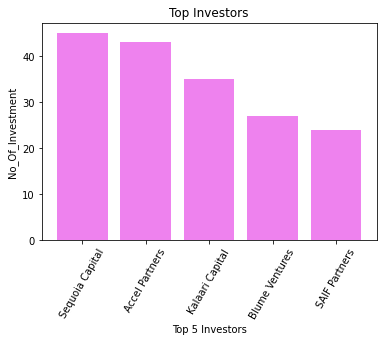

In [80]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[df.InvestmentType == 'Private Equity']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count,color='violet')
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()